In [2]:
# Data manipulation and visualisation libraries 
import numpy as np 
import pandas as pd 
import matplotlib. pyplot as plt 
import seaborn as sns 

# machine learning libraries 
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

# Machine learning models 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
# Load the dataset 
df = pd.read_csv('Invistico_Airline.csv')
df.head(10)

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0
5,satisfied,Male,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,...,2,2,5,4,5,5,4,2,0,0.0
6,satisfied,Female,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,...,5,5,5,0,5,5,5,3,17,15.0
7,satisfied,Male,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,...,2,2,3,3,4,5,4,2,0,0.0
8,satisfied,Female,Loyal Customer,56,Personal Travel,Business,73,0,0,0,...,5,4,4,0,1,5,4,4,0,0.0
9,satisfied,Male,Loyal Customer,22,Personal Travel,Eco,1556,0,0,0,...,2,2,2,4,5,3,4,2,30,26.0


In [4]:
df.shape

(129880, 23)

In [5]:
# seeing if there any null values 
df.isnull().sum()

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [6]:
# Seeing if there any duplicate values 
df.duplicated().sum()

0

In [7]:
# Seeing the information about the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

In [8]:
categorical_features = ['satisfaction', 'Gender', 'Customer Type', 'Type of Travel', 
                        'Class', 'Seat comfort','Departure/Arrival time convenient',
                        'Food and drink', 'Gate location','Inflight wifi service', 
                        'Inflight entertainment', 'Online support','Ease of Online booking',
                        'On-board service', 'Leg room service','Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding']
for i in categorical_features:
    print(df[i].value_counts())
    print('_' * 50)

satisfaction
satisfied       71087
dissatisfied    58793
Name: count, dtype: int64
__________________________________________________
Gender
Female    65899
Male      63981
Name: count, dtype: int64
__________________________________________________
Customer Type
Loyal Customer       106100
disloyal Customer     23780
Name: count, dtype: int64
__________________________________________________
Type of Travel
Business travel    89693
Personal Travel    40187
Name: count, dtype: int64
__________________________________________________
Class
Business    62160
Eco         58309
Eco Plus     9411
Name: count, dtype: int64
__________________________________________________
Seat comfort
3    29183
2    28726
4    28398
1    20949
5    17827
0     4797
Name: count, dtype: int64
__________________________________________________
Departure/Arrival time convenient
4    29593
5    26817
3    23184
2    22794
1    20828
0     6664
Name: count, dtype: int64
__________________________________________

we identified a significant issue within certain rating feature. There very low values in the rating '0' and this poses a big issue to meaningful analysis.To address this we going to merge the votes on rating '0' to the voting of rating '1' 

In [9]:
# Define a mapping dictionary to combine the clusters 
cluster_mapping = {
    'Seat comfort': {0: 1},
    'Departure/Arrival time convenient': {0: 1},
    'Food and drink': {0: 1},
    'Gate location': {0: 1},
    'Inflight wifi service': {0: 1},
    'Inflight entertainment': {0: 1},
    'Online support': {0: 1},
    'Ease of Online booking': {0: 1},
    'On-board service': {0: 1},
    'Leg room service': {0: 1},
    'Baggage handling': {0: 1},
    'Checkin service': {0: 1},
    'Cleanliness': {0: 1},
    'Online boarding': {0: 1}
}
# Update the specified columns with new cluster labels using applymap 
for col, mapping in cluster_mapping.items():
    df[col] = df[col].apply(lambda x: mapping.get(x,x))


In [10]:
# check if the rating features have a rating from 1 to 5 was done correctly 
for i in categorical_features:
    print(df[i].value_counts())
    print('_'* 50)

satisfaction
satisfied       71087
dissatisfied    58793
Name: count, dtype: int64
__________________________________________________
Gender
Female    65899
Male      63981
Name: count, dtype: int64
__________________________________________________
Customer Type
Loyal Customer       106100
disloyal Customer     23780
Name: count, dtype: int64
__________________________________________________
Type of Travel
Business travel    89693
Personal Travel    40187
Name: count, dtype: int64
__________________________________________________
Class
Business    62160
Eco         58309
Eco Plus     9411
Name: count, dtype: int64
__________________________________________________
Seat comfort
3    29183
2    28726
4    28398
1    25746
5    17827
Name: count, dtype: int64
__________________________________________________
Departure/Arrival time convenient
4    29593
1    27492
5    26817
3    23184
2    22794
Name: count, dtype: int64
__________________________________________________
Food and drin

following the refinement of the rating features, the next step is to investigate the correlations among numerical data variables 

In [11]:
# Numerical columns 
numerical_features = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

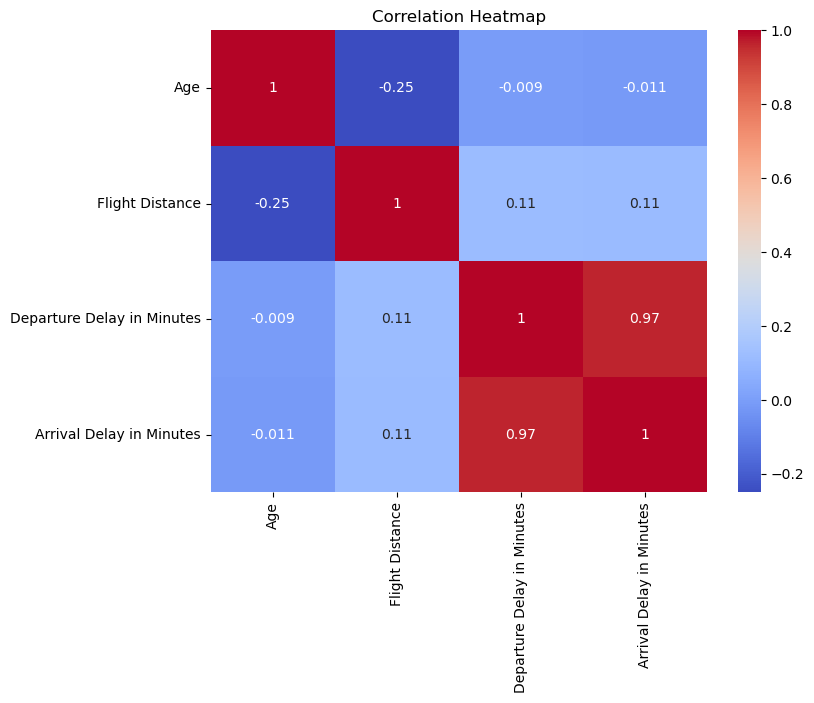

In [12]:
plt.figure(figsize=(8, 6))

# Calculate the correlation matrix for the numerical columns 
correlation_matrix = df[numerical_features].corr()

# Create a heatmap using the correlation matrix 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

#set the title of the heatmap
plt.title('Correlation Heatmap')

# Display the heatmap
plt.show()

There is a strong correlation of 0.97 between arrival delay in minutes and departure delay in minutes. this means that they essentially represent the same values. its advisable to eliminate one of them, And we noticed missing values arrival delay in minutes hence we drop it. This simplification will streamline our analysis while retaining essential information  

In [13]:
df.drop('Arrival Delay in Minutes', axis = 1, inplace=True)

## Data Visualissation and Analysis

In [14]:
rating_features = ['Seat comfort', 'Departure/Arrival time convenient', 'Food and drink', 'Gate location', 
                   'Inflight wifi service', 'Inflight entertainment', 'Online support', 'Ease of Online booking',
                   'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Cleanliness',
                   'Online boarding']

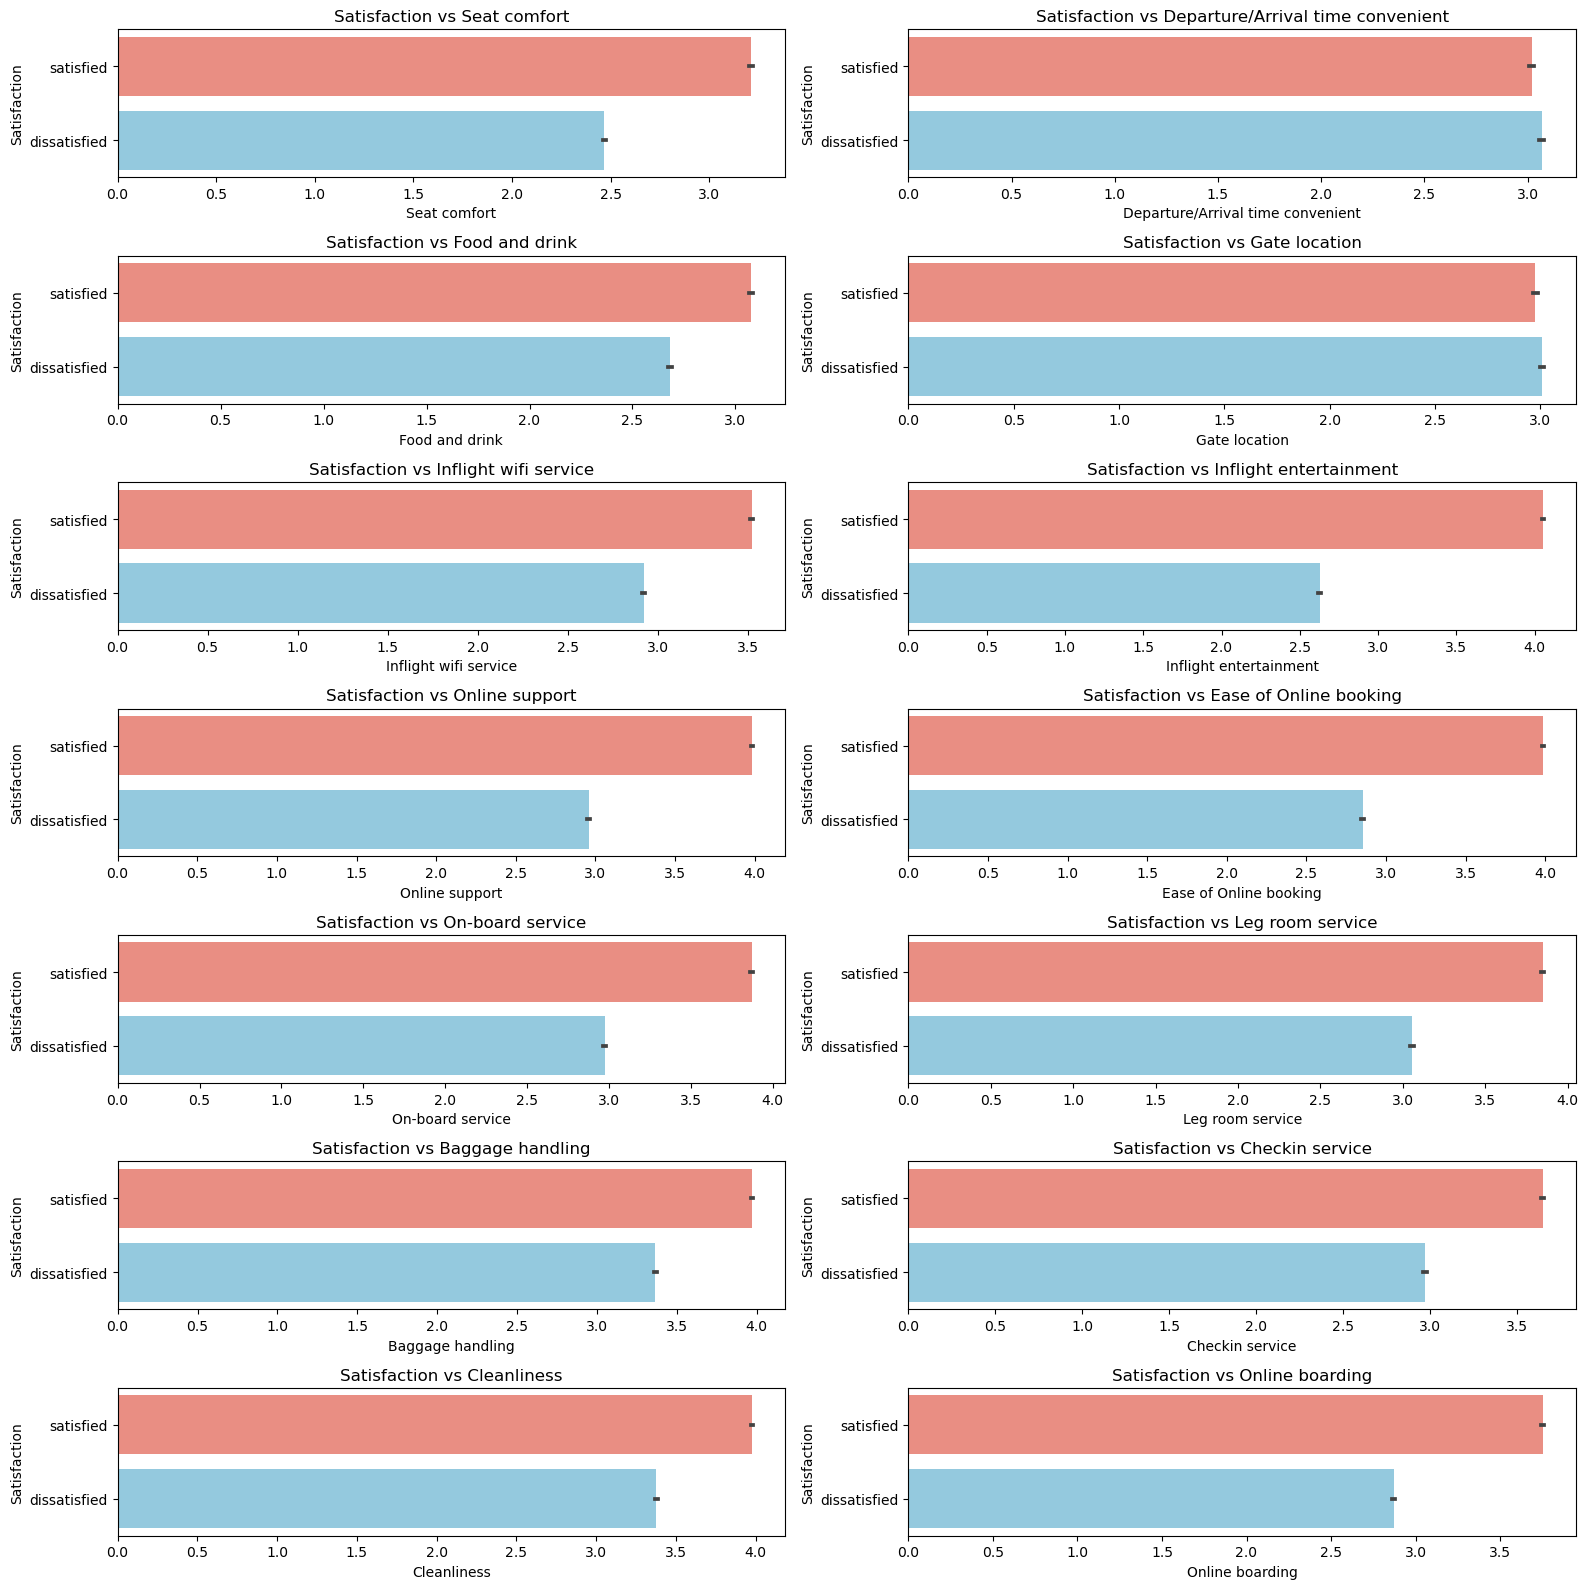

In [15]:
# set up subplots with 7 rows and 2 columns 
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(16, 16))

# Iterate through the rating features and create bar plots 
for i, feature in enumerate(rating_features):
    row, col = divmod(i, 2)
    sns.barplot(x=feature, y="satisfaction", data=df, ax=axes[row, col], palette=['salmon', 'skyblue'])
    # Setting titles, x-axis labels, and y-axis labels for each subplot
    axes[row, col].set_title(f'Satisfaction vs {feature}')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Satisfaction')

# Adjust subplot layout 
plt.tight_layout()
plt.show()




Our objective is to identify the most influential features affecting customer satisfaction. Our analysis reveals that 'Departure/arrival time convenient' and 'Gate location' appear to have no effect on customer satisfaction. 
we notice that 'Inflight entertainment' plays a pivotal role in customer satisfaction, with a substantial difference between satisfied and dissatiisfied. 
consequently, it can be considered the most influential. additionally 'Seat comfort', 'online Support', 'Ease of online booking', 'on-board service','Leg room service' and 'Online boarding' closely follow 'Inflight entertainment' in terms of importance.

However other features, while still contributing to customer satisfaction, exhibit a comparatively weaker influence.

This analysis assists in prioritizing which aspects of the airline's service may require particular attention for enhancing overall customer satisfaction  

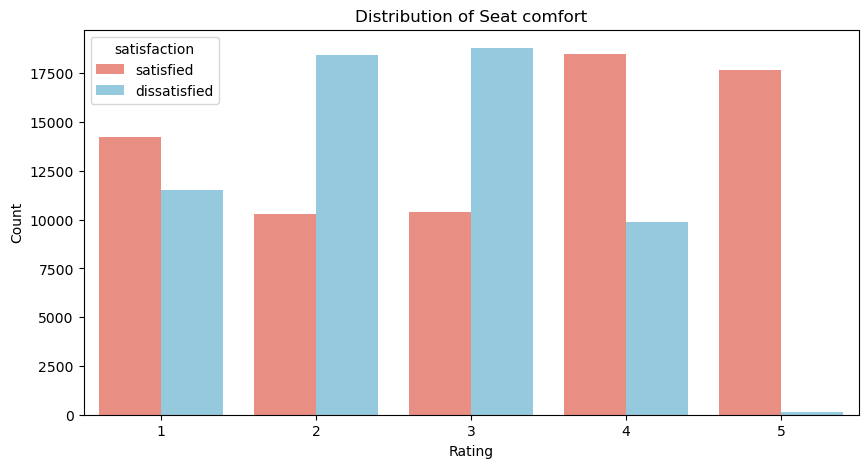

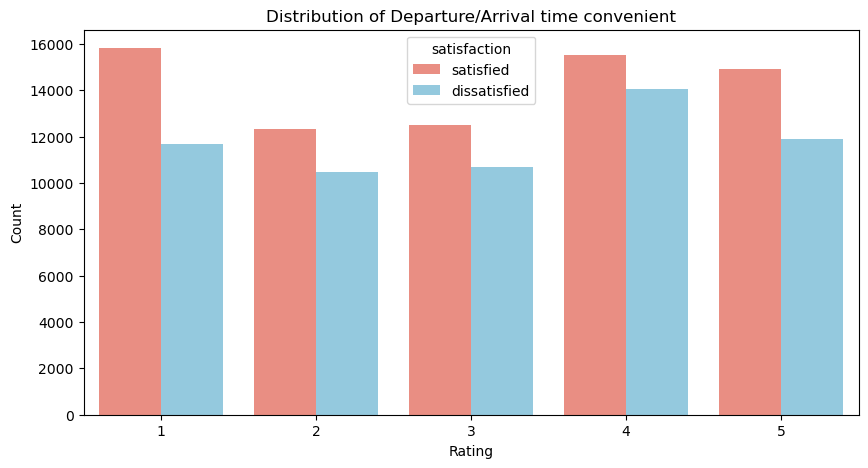

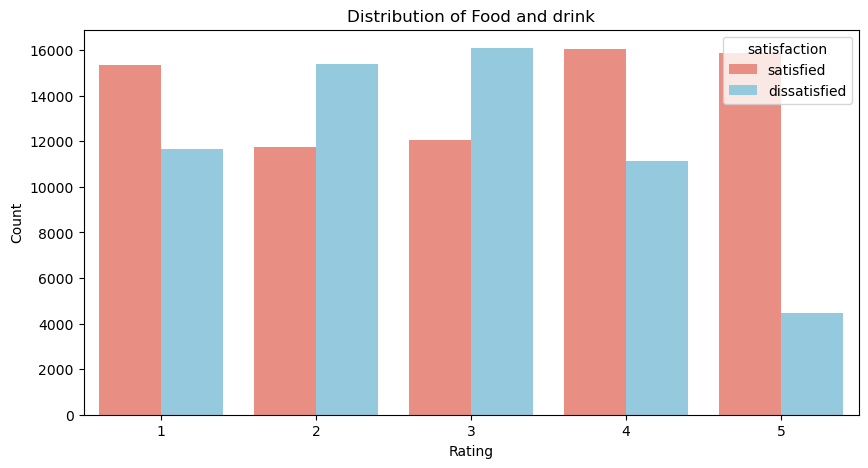

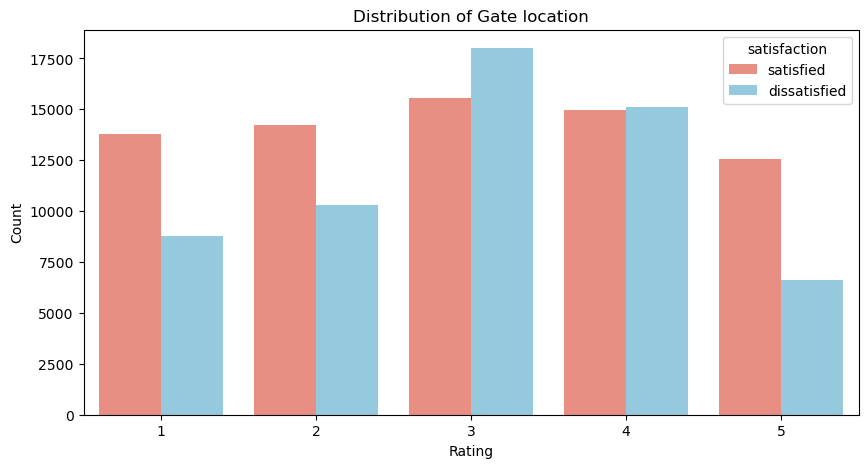

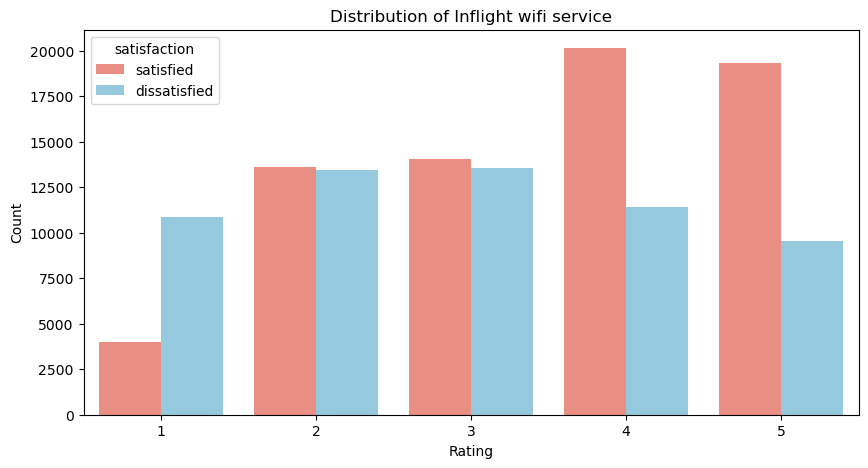

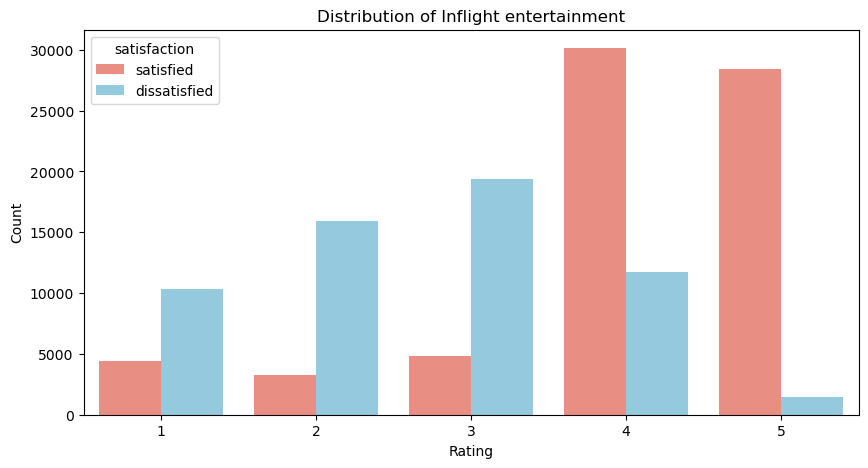

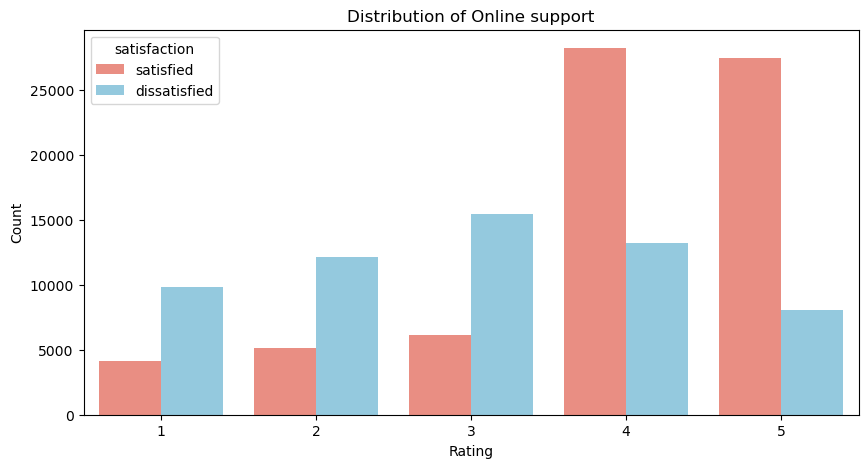

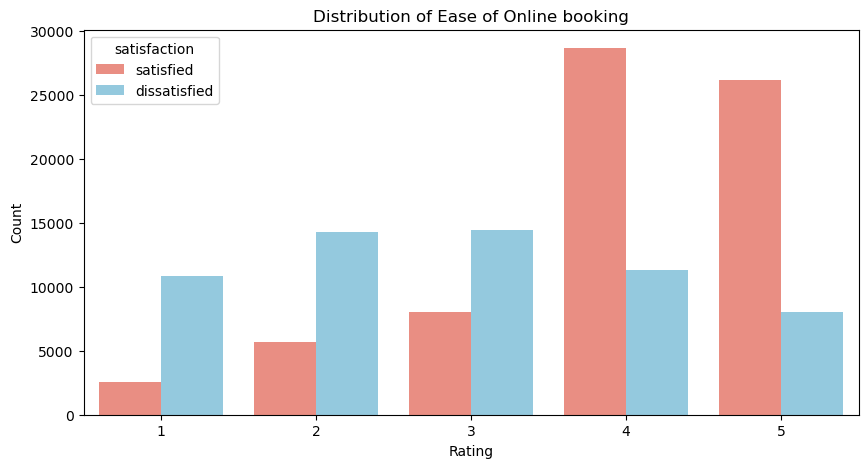

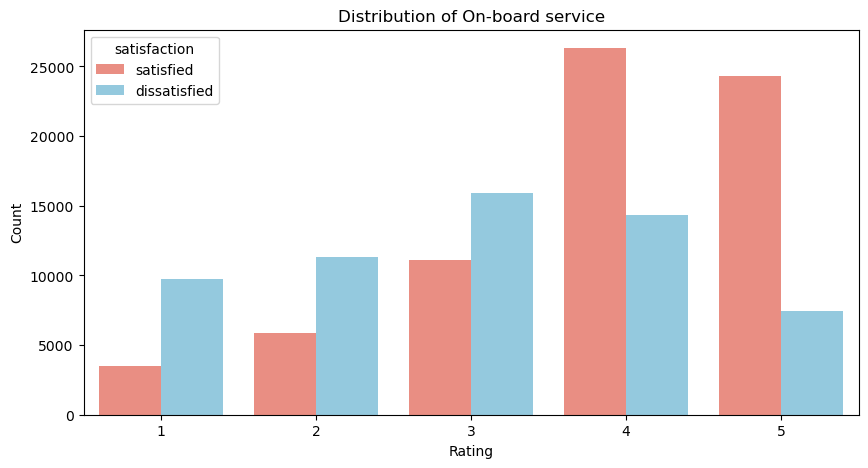

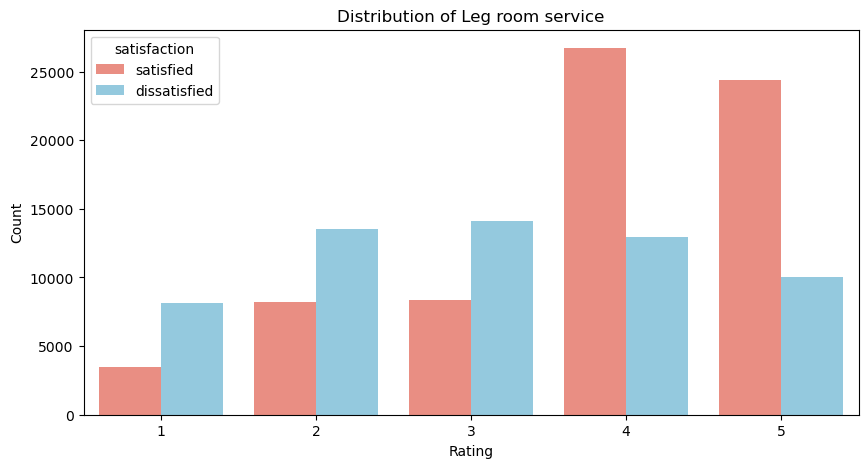

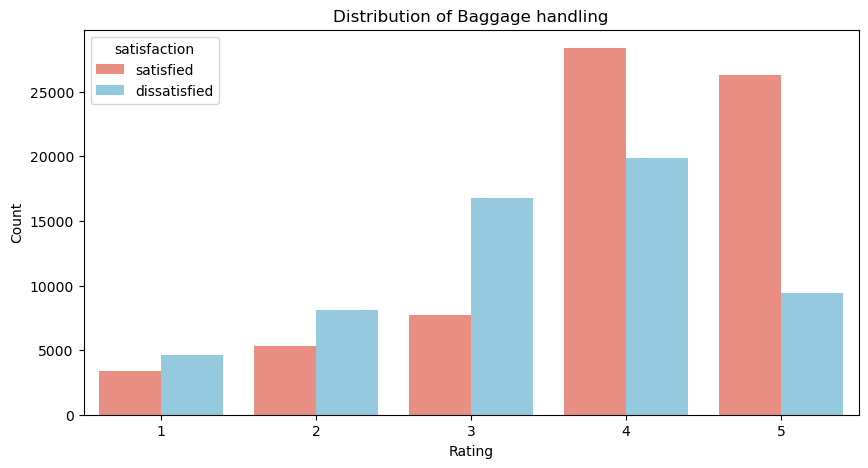

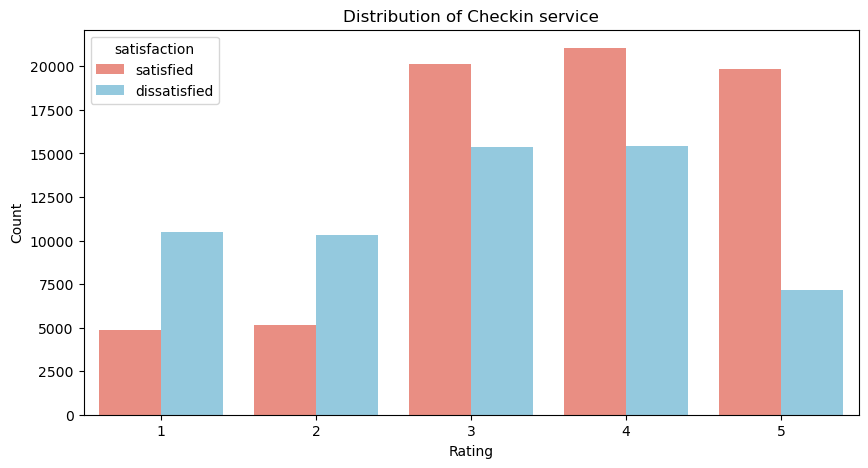

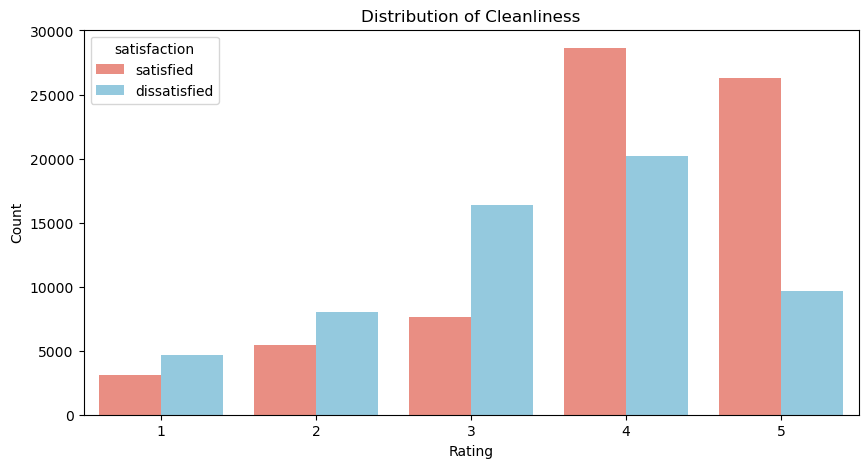

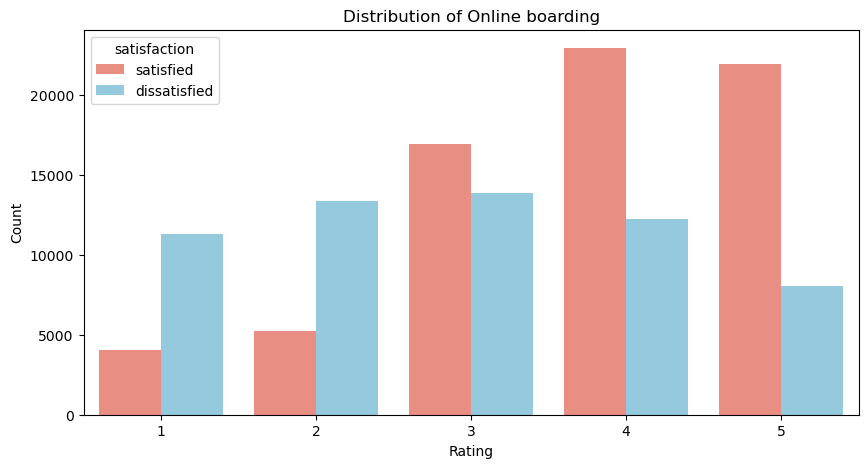

In [35]:
# Iterate through each rating column 
for col in rating_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=col, hue='satisfaction', palette=['salmon', 'skyblue'])

    # Setting the titl, labels and rotation for the x-axis ticks on a plot
    plt.title('Distribution of {}'.format(col))
    plt.xlabel('Rating')
    plt.ylabel('Count')
    plt.xticks(rotation=0)

    plt.show()

In these visualizations we go deeper to understand the features according to their ratings, we notice for Inflight entertainment most of the customers that rated 4 and 5 are satisfied as well those of 1 to 3 are dissatisfied meaning it plays a great role to their satisfaction. 
Similarly, when examining 'Seat comfort,' 'Online support,' 'Ease of Online booking,' 'On-board service,', 'Leg room service,' and 'Online boarding' we notice that most customers who provide ratings of 4 or 5 express satisfaction, unlike lower ratings. This suggests that these factors are pivotal in determining customer satisfaction.

In conclusion we recommend to:

Enhance Inflight Entertainment: Given its substantial impact on customer     satisfaction, investing in and improving inflight entertainment options could yield significant benefits.

Prioritize Seat Comfort: Focus on enhancing seat comfort to further elevate customer satisfaction levels.

Strengthen Online Support: Continue to provide robust online support  services, as they contribute positively to customer satisfaction.

Monitor and Improve Other Features: While other features show less pronounced effects, they should not be ignored. Continue to monitor and make incremental improvements to all aspects of the airline service to maintain overall customer satisfaction.

Note
These recommendations are based on our analysis of the correlation between customer ratings and satisfaction levels for each feature and should guide efforts to enhance customer experience and satisfaction.

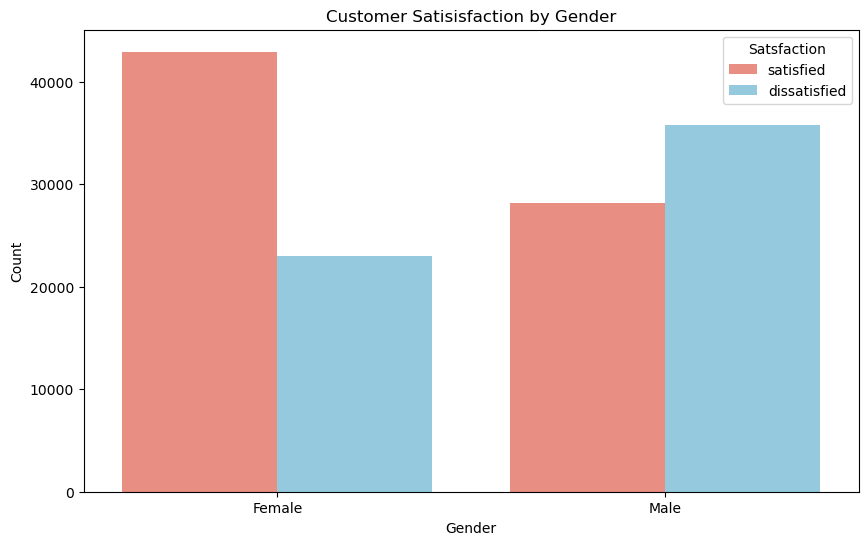

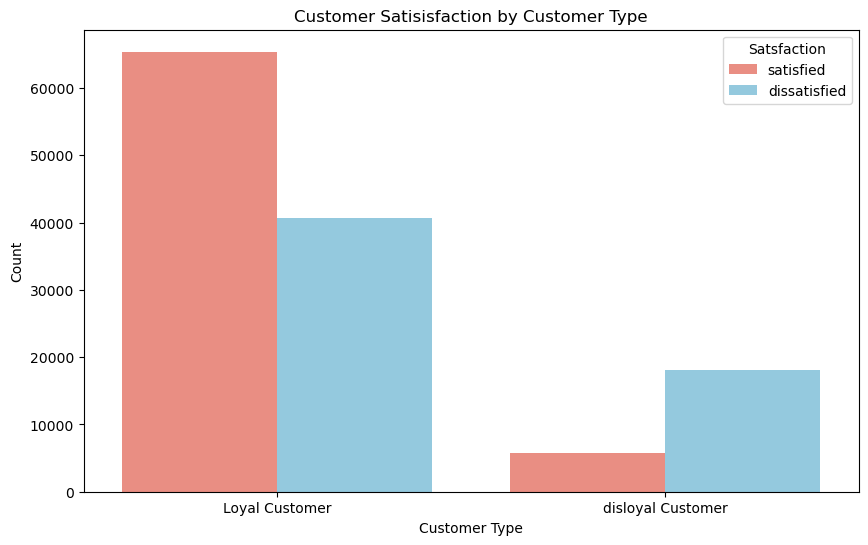

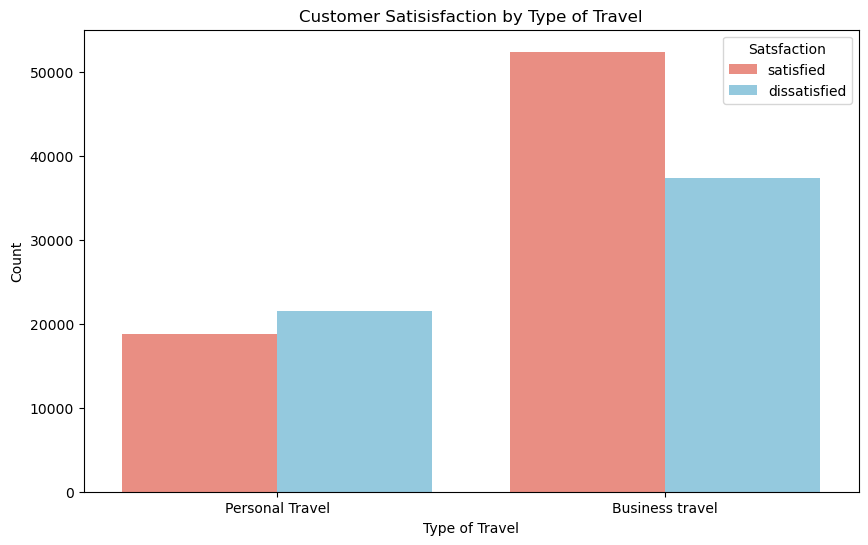

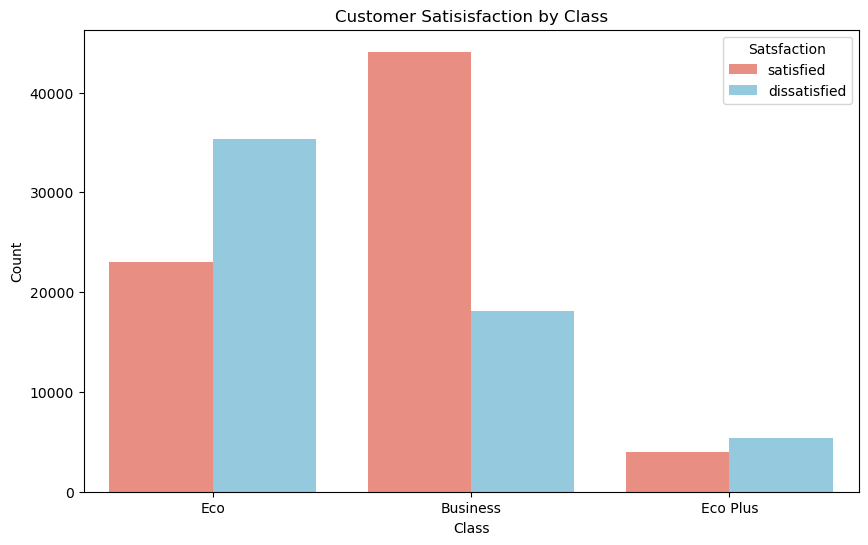

In [17]:
# iterate through each categorical column
for col in ['Gender', 'Customer Type', 'Type of Travel', 'Class']:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col, hue='satisfaction', palette=['salmon', 'skyblue'])

    # Setting the title, labels and legend for a plot depicting customer satisfaction by a specific feature
    plt.title('Customer Satisisfaction by {}'.format(col))
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='Satsfaction', loc='upper right')

    # Display the plot 
    plt.show()

These visuals highlight several significant trends: firstly, women tend to exhibit higher levels of satisfaction compared to men. Secondly, customers in the 'Business' travel category generally report higher satisfaction levels than those in 'Eco' and 'Eco Plus.' This discrepancy likely arises from the enhanced and more comfortable services typically associated with 'Business' class.

Additionally, the data indicates that 'Business' travelers are consistently more satisfied than 'Personal' travelers, who exhibit a nearly equal ratio of satisfied to dissatisfied customers. Lastly, 'loyal' customers tend to express higher satisfaction levels, while 'disloyal' customers are predominantly dissatisfied.

Our current focus is to uncover the reasons behind the greater satisfaction of 'Business' travelers and the recurring dissatisfaction among 'disloyal' customers. Could the presence or absence of specific features, such as 'Inflight entertainment,' play a role in these patterns?

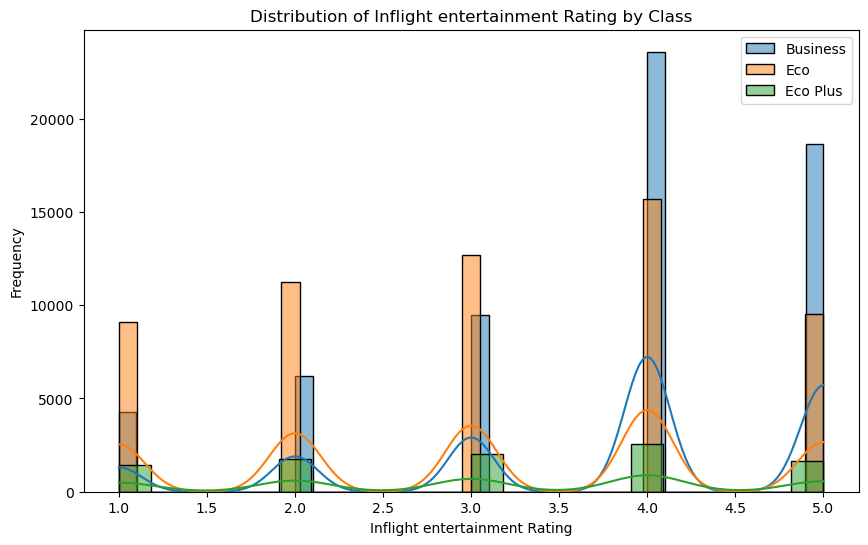

In [18]:
plt.figure(figsize=(10, 6))

# Plotting histograms 'Inflight entertainment' ratings by different classes 
sns.histplot(df[df['Class']== 'Business']['Inflight entertainment'], label='Business', kde=True)
sns.histplot(df[df['Class']== 'Eco']['Inflight entertainment'], label='Eco', kde=True)
sns.histplot(df[df['Class'] == 'Eco Plus']['Inflight entertainment'], label='Eco Plus', kde=True)

#Setting the title, x-axis, y-axis and adding a legend
plt.xlabel('Inflight entertainment Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Inflight entertainment Rating by Class')
plt.legend()

# Displaying the plot 
plt.show()

The reason for the heightened satisfaction among 'Business' passengers becomes apparent: they enjoy more extensive 'Inflight entertainment' services compared to 'Eco' and 'Eco Plus' passengers. This difference in available entertainment options emerges as a likely explanation for the varying levels of satisfaction.

In conclusion we recommend to:

Enhance Inflight Entertainment in Economy Classes: To improve customer satisfaction in 'Eco' and 'Eco Plus,' consider enhancing the Inflight entertainment offerings in these classes to align them more closely with the higher-rated 'Business' class.

Highlight Inflight Entertainment as a Feature: In marketing and service promotions, emphasize the availability and quality of Inflight entertainment, especially in 'Business' class, to attract and retain customers who value this feature.

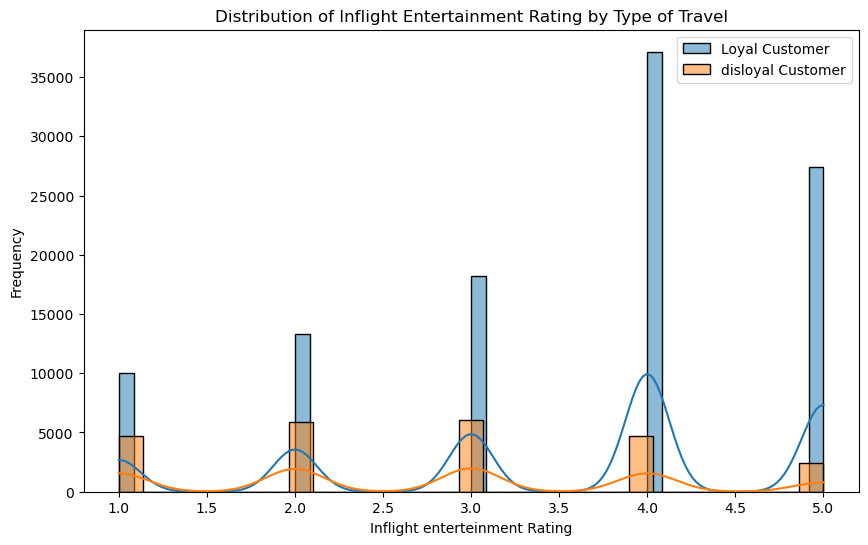

In [19]:
plt.figure(figsize=(10, 6))

# Plotting histograms 'Inflight entertainment' ratings by different Customer Type
sns.histplot(df[df['Customer Type'] == 'Loyal Customer']['Inflight entertainment'], label='Loyal Customer', kde=True)
sns.histplot(df[df['Customer Type'] == 'disloyal Customer']['Inflight entertainment'], label='disloyal Customer', kde=True)

# Setting the title, x-axis, y-axis aand adding a legend 
plt.xlabel('Inflight enterteinment Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Inflight Entertainment Rating by Type of Travel')
plt.legend()
plt.show()

 This graph shows the significance of 'Inflight Entertainment' in shaping customer satisifaction levels. Disloyal customers tend to provide lower ratings compared to loyal customers. This shows why disloyal customers often express dissatisfaction dissatisfaction and highlights the crucial role of investing in and enhancing this feature 


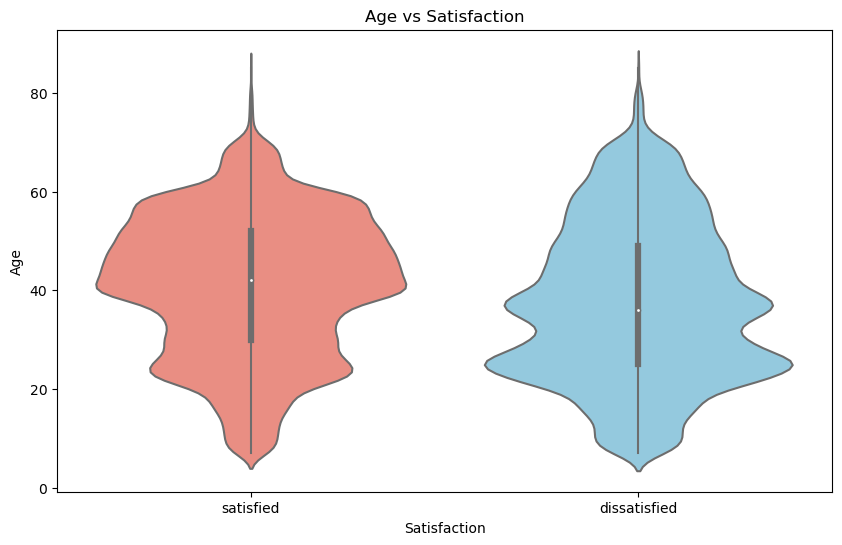

In [23]:
plt.figure(figsize=(10, 6))

# Create a violin plot 
sns.violinplot(x='satisfaction', y='Age', data=df, palette=['salmon', 'skyblue'])

#Add labels and titles 
plt.xlabel('Satisfaction')
plt.ylabel('Age')
plt.title('Age vs Satisfaction')
plt.show()

The plot of the violin clearly demostrates a marked variance in the age distribution between satisfied and dissatisfied individuals. It reveals the satisfied individuals range(40 to 60). compared to the dissatisfied customers that range(20 to 40). This observation to a possible age influence on levels of satisfaction, as older people tend to express greater satsisfaction
A possible explanation is that younger individuals tend to have more specific and demands and expectation, which makes meeting their satisfaction standards relatively more difficult. 


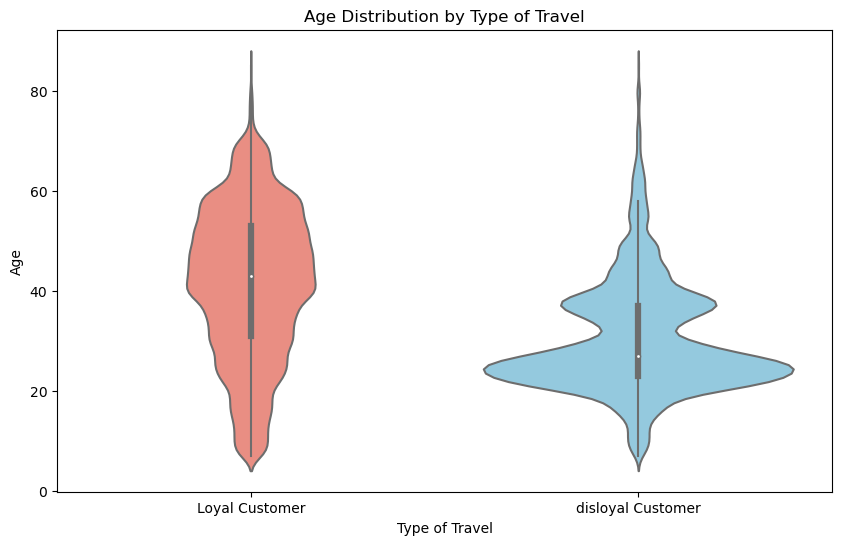

In [24]:
plt.figure(figsize=(10, 6))
# Create a violin plot 
sns.violinplot(data=df, x='Customer Type', y='Age', palette=['salmon', 'skyblue'])

# Add title labels 
plt.xlabel('Type of Travel')
plt.ylabel('Age')
plt.title('Age Distribution by Type of Travel')
plt.show()

We notice the same age group of dissatisfied customers ie 20 to 40 as revealed in the previous graph. from these observations, it becomes evident that disloyal customers are mostly between 20 to 40 years. This shows us that focusing on inflight entertainment for cutomers within this age group could enhance their satisfaction levels. This could as well attract more customers within this range. 

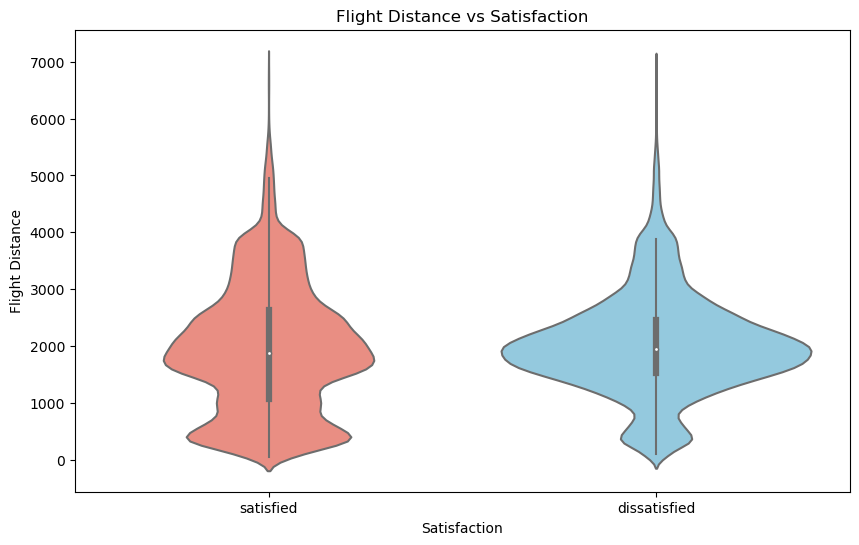

In [25]:
# Create a violin plot 
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='satisfaction', y='Flight Distance', palette=['salmon', 'skyblue'])

# Add labels and title 
plt.xlabel('Satisfaction')
plt.ylabel('Flight Distance')
plt.title('Flight Distance vs Satisfaction')
plt.show()

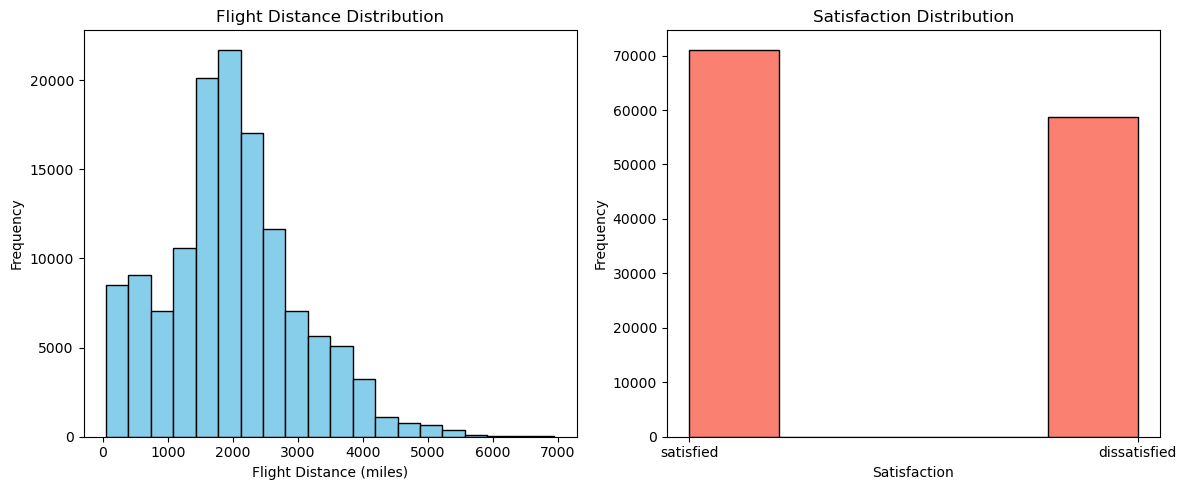

In [26]:
# Creating a side by side histogram subplot for flight distance and Satisfaction distribution 
plt.figure(figsize=(12, 5))

# Creating the left subplot
plt.subplot(1,2,1)
plt.hist(df['Flight Distance'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Flight Distance (miles)')
plt.ylabel('Frequency')
plt.title('Flight Distance Distribution')

# Creating the right subplot
plt.subplot(1, 2, 2)
plt.hist(df['satisfaction'], bins=5, color= 'salmon', edgecolor='black')
plt.xlabel('Satisfaction')
plt.ylabel('Frequency')
plt.title('Satisfaction Distribution')

# Ensuring proper spacing and layout between subplots 
plt.tight_layout()

plt.show()

While there are a few ouliers, Overall customer satisfaction doesnot appear to be significantly influenced by Flight distance 

## Data Processing 

In [27]:
# Split data into x and y 
X = df.drop('satisfaction', axis=1)
y = df['satisfaction']

In [28]:
# Encoding and scaling the data 

# one hot Encoding
X = pd.get_dummies(X, columns=['Class'])

# Label Encoding 
label_encoder = LabelEncoder()
for i in ['Gender', 'Customer Type', 'Type of Travel']:
    X[i] = label_encoder.fit_transform(X[i])

In [29]:
# Selecting the features we going to scale
selected_features = X[['Age', 'Flight Distance', 'Departure Delay in Minutes']]

# Creating a scaler object
scaler = StandardScaler()

# Fitting scaler on the selected features
scaler.fit(selected_features)

# Transform the selected features with the scaler 
selected_features_scaled = scaler.transform(selected_features)

# Replace the original columns with the scaled values in the DataFrame 
X[['Age', 'Flight Distance', 'Departure Delay in Minutes']] = selected_features_scaled

X.head()

,Gender,Customer Type,Age,Type of Travel,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,...,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Class_Business,Class_Eco,Class_Eco Plus
0,0,0,1.691351,1,-1.671103,1,1,1,2,2,...,3,1,3,5,3,2,-0.386481,False,True,False
1,1,0,0.500820,1,0.469852,1,1,1,3,1,...,4,4,4,2,3,2,7.756204,True,False,False
2,0,0,-1.615680,1,0.152458,1,1,1,3,2,...,3,3,4,4,4,2,-0.386481,False,True,False
3,0,0,1.360648,1,-1.322552,1,1,1,3,3,...,1,1,1,4,1,3,-0.386481,False,True,False
4,0,0,2.022054,1,-1.584452,1,1,1,3,4,...,2,1,2,4,2,5,-0.386481,False,True,False


## Modeling

In [30]:
# Define a list of models to evaluate 
models = [
    LogisticRegression(max_iter=1000),
    DecisionTreeClassifier(),
    RandomForestClassifier()
]

In [32]:
# Split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Iterate over each model and evaluate its accuracy using cross_validation
for model in models:
    scores = cross_val_score(model, X_train, y_train, cv=5)

    # Print the mean accuracy score for the current model
    print(f'{model. __class__ . __name__}: Mean Accuracy = {scores.mean()}')

LogisticRegression: Mean Accuracy = 0.8395634324665137
DecisionTreeClassifier: Mean Accuracy = 0.9217162124152887
RandomForestClassifier: Mean Accuracy = 0.9459982426384432


After evaluating multiple classification models, we found that the Random Forest algorithm demonstrated the best performance based on the mean accuracy metric. Therefore, we selected the Random Forest model to make predictions on our test data.

In [33]:
# Make the random forest model with specific hyperparameters 
model = RandomForestClassifier()
# Fit the model 
model.fit(X_train, y_train)

# Predict y-predict
y_pred = model.predict(X_test)

# Evaluate the accuracy of y-predict
acc = accuracy_score(y_test, y_pred)
print(f'Accuracy: {acc:.3f}')

Accuracy: 0.950


## Feature Importance

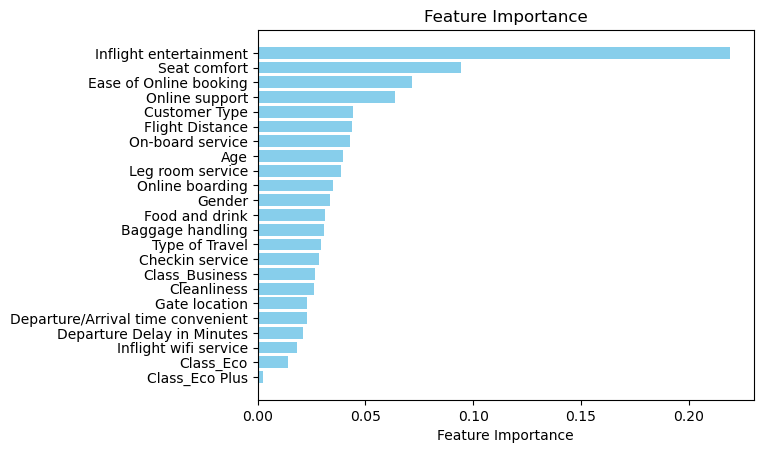

In [34]:
# Get feature importances
feature_importance = model.feature_importances_

# Sorted feature importance indices
sorted_idx = np.argsort(feature_importance)

# Retrieve feature names 
features = X.columns

# Plot feature importance
plt.figure()
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center', color='skyblue')
plt.yticks(range(len(sorted_idx)), features[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importance')
plt.show()

## Conclusion

Our analysis demonstrates that several factors contribute to customer satisfaction in the airline industry. Notably, gender, customer type, and class play a significant role, with women, loyal customers, and those in the business class generally reporting higher satisfaction levels.

Furthermore, rating features such as "Inflight Entertainment" and "Seat Comfort" have emerged as crucial determinants of overall satisfaction. The "Inflight Entertainment" feature, in particular, has shown substantial influence.

Importantly, we discovered that age also influences satisfaction, with older passengers typically expressing higher satisfaction levels.

In our predictive modeling, the Random Forest algorithm yielded outstanding results, achieving an accuracy of 95%. This algorithm, along with feature importance analysis, confirmed the pivotal role of "Inflight Entertainment" and "Seat Comfort" in shaping customer satisfaction.

In conclusion, this analysis equips Invistico Airlines with insights to prioritize areas for improvement, specifically enhancing Inflight Entertainment and seat comfort. By addressing these aspects, the airline can foster higher customer satisfaction, bolster customer loyalty, and elevate its overall service quality.